# Warehouse Storage Optimization

## 1. Storage Location Assignment

### Distance Matrix and Weights




In [12]:
import pandas as pd

# Required storage spaces needed data S_i
storage_spaces = {"A" : 3, "B" : 5, "C" : 2, "D" : 6}
total_spaces = sum(storage_spaces.values())

# Frequency of trips data f_ik
frequency = {"IO Point 1" : {"A" : 150, "B" : 60, "C" : 96, "D" : 175},
            "IO Point 2" : {"A" : 25, "B" : 200, "C" : 15, "D" : 135},
            "IO Point 3" : {"A" : 88, "B" : 150, "C" : 85, "D" : 90},
}
frequency_df = pd.DataFrame(frequency).loc[["A", "B", "C", "D"]]

# Cost data c_ik
cost = {"IO Point 1" : {"A" : 6, "B" : 7, "C" : 4, "D" : 15},
        "IO Point 2" : {"A" : 5, "B" : 3, "C" : 7, "D" : 8},
        "IO Point 3" : {"A" : 5, "B" : 6, "C" : 9, "D" : 12},
}
cost_df = pd.DataFrame(cost).loc[["A", "B", "C", "D"]]

# Define the IO points coordinates
io_points = {1: (2.5, 0.5), 2: (0.5, 2.5), 3: (2.5, 4.5)}

storage_locations = {}
idx = 1
for y in range(4, 0, -1):
    for x in range(1,5):
        storage_locations[idx] = (x, y)
        idx += 1

#print(storage_locations)

def manhattan_distance(point1, point2):
    return abs(point1[0] - point2[0]) + abs(point1[1] - point2[1])

# Calculate distance matrix d_kj
distance_matrix = pd.DataFrame(index=io_points.keys(), columns=storage_locations.keys())

for k, io_coord in io_points.items():
    for j, storage_coord in storage_locations.items():
        distance_matrix.loc[k, j] = manhattan_distance(io_coord, storage_coord)

print("Distance Matrix (d_kj): \n")
print(distance_matrix)

items = ["A", "B", "C", "D"]
weights_matrix = pd.DataFrame(index=items, columns=storage_locations.keys())

for i in items:
    for j in storage_locations.keys():
        total_weight = 0
        for k in io_points.keys():
            f_ik = frequency_df.loc[i, f"IO Point {k}"]
            c_ik = cost_df.loc[i, f"IO Point {k}"]
            d_kj = distance_matrix.loc[k, j]
            total_weight += f_ik * (c_ik + d_kj)
        weights_matrix.loc[i, j] = total_weight / total_spaces

print("Weight matrix w_ij (items × storage locations):")
print(weights_matrix)

Distance Matrix (d_kj): 

    1    2    3    4    5    6    7    8    9    10   11   12   13   14   15  \
1  5.0  4.0  4.0  5.0  4.0  3.0  3.0  4.0  3.0  2.0  2.0  3.0  2.0  1.0  1.0   
2  2.0  3.0  4.0  5.0  1.0  2.0  3.0  4.0  1.0  2.0  3.0  4.0  2.0  3.0  4.0   
3  2.0  1.0  1.0  2.0  3.0  2.0  2.0  3.0  4.0  3.0  3.0  4.0  5.0  4.0  4.0   

    16  
1  2.0  
2  5.0  
3  5.0  
Weight matrix w_ij (items × storage locations):
         1        2         3         4        5         6         7   \
A  152.5625   139.25  140.8125    157.25  147.125  133.8125   135.375   
B     182.5  181.875   194.375     220.0  175.625     175.0     187.5   
C   120.875    110.5  111.4375  123.6875   119.25   108.875  109.8125   
D   381.875   373.75  382.1875  407.1875  368.125     360.0  368.4375   

         8         9         10       11        12        13        14  \
A  151.8125    143.25  129.9375    131.5  147.9375  140.9375   127.625   
B   213.125    181.25   180.625  193.125    218.75   19

### Mathematical Model (SLAP)

Cost matrix (items × storage locations):
        1        2        3        4        5        6        7        8   \
A   5630.0   4415.0   4540.0   6005.0   5045.0   3830.0   3955.0   5420.0   
B   5100.0   4380.0   4980.0   6900.0   4980.0   4260.0   4860.0   6780.0   
C   3660.0   2616.0   2721.0   3975.0   3936.0   2892.0   2997.0   4251.0   
D  17445.0  14820.0  15900.0  20685.0  14820.0  12195.0  13275.0  18060.0   

        9        10       11       12       13       14       15       16  
A   4585.0   3370.0   3495.0   4960.0   4250.0   3035.0   3160.0   4625.0  
B   5460.0   4740.0   5340.0   7260.0   6540.0   5820.0   6420.0   8340.0  
C   4317.0   3273.0   3378.0   4632.0   4803.0   3759.0   3864.0   5118.0  
D  13275.0  10650.0  11730.0  16515.0  12810.0  10185.0  11265.0  16050.0  
Optimal total travel cost: 115196
Assigned counts: {'B': 5, 'C': 2, 'A': 3, 'D': 6}
Slot -> Item assignment:
 1 : B
 2 : B
 3 : C
 4 : C
 5 : B
 6 : B
 7 : B
 8 : A
 9 : D
10 : D
11 : D
12 : A


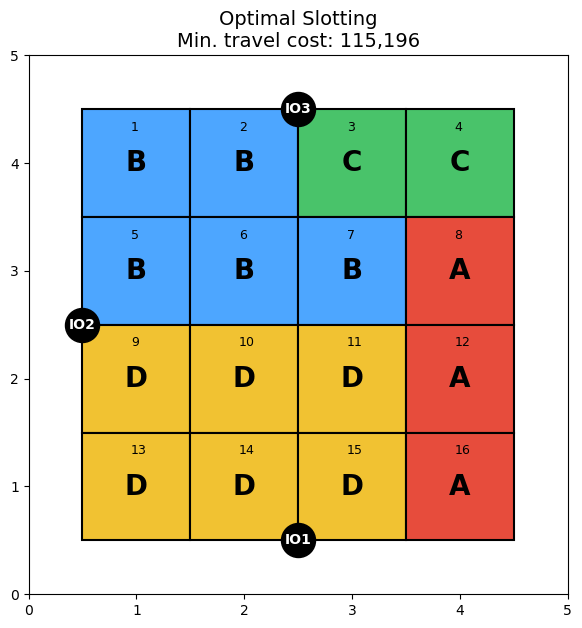

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Inputs
storage_spaces = {"A": 3, "B": 5, "C": 2, "D": 6}

frequency = {
    "IO Point 1": {"A": 150, "B": 60,  "C": 96, "D": 175},
    "IO Point 2": {"A": 25,  "B": 200, "C": 15, "D": 135},
    "IO Point 3": {"A": 88,  "B": 150, "C": 85, "D": 90},
}
frequency = pd.DataFrame(frequency)   # index rows = A,B,C,D; columns = IO Point 1..3

cost = {
    "IO Point 1": {"A": 6,  "B": 7,  "C": 4,  "D": 15},
    "IO Point 2": {"A": 5,  "B": 3,  "C": 7,  "D": 8},
    "IO Point 3": {"A": 5,  "B": 6,  "C": 9,  "D": 12},
}
cost = pd.DataFrame(cost)

# Grid and centers 
# slots numbered 1..16 left->right, top->bottom (1..4 top row, 13..16 bottom row)
slots = {}
n = 1
for y in range(4, 0, -1):         # y = 4,3,2,1 (top to bottom)
    for x in range(1, 5):         # x = 1..4 (left to right)
        slots[n] = (x, y)
        n += 1

centers = {s: (x - 0.5, y - 0.5) for s, (x, y) in slots.items()}

# I/O coordinates 
io_coords = {
    1: (2.5, 0.5),   # IO1
    2: (0.5, 2.5),   # IO2
    3: (2.5, 4.5),   # IO3
}

# Building cost matrix
items = ["A", "B", "C", "D"]
S = storage_locations.keys()   # same as before, slots 1..16

cost_matrix = pd.DataFrame(index=items, columns=S, dtype=float)

for i in items:
    for j in S:
        total_cost = 0
        for k in io_points.keys():
            f_ik = frequency_df.loc[i, f"IO Point {k}"]
            c_ik = cost_df.loc[i, f"IO Point {k}"]
            d_kj = distance_matrix.loc[k, j]
            total_cost += f_ik * c_ik * d_kj
        cost_matrix.loc[i, j] = total_cost

print("Cost matrix (items × storage locations):")
print(cost_matrix)

# Basic checks
total_slots = len(S)
total_items = sum(storage_spaces.values())
assert total_slots == total_items, f"Number of slots ({total_slots}) must equal total items ({total_items})."

# Solver, Dynamic Programming
Q = storage_spaces.copy()

# dp maps a state (a,b,c,d) to minimal cost after processing previous slots
dp = {(0, 0, 0, 0): 0.0}
# parent[(idx, state_after_assignment)] = (state_before, item_assigned, slot_number)
parent = {}

for idx, slot in enumerate(S, start=1):
    best_cost = {}
    for state, cost_so_far in dp.items():
        a, b, c, d = state
        # A
        if a < Q['A']:
            ns = (a + 1, b, c, d)
            new_cost = cost_so_far + cost_matrix.loc['A', slot]
            if ns not in best_cost or new_cost < best_cost[ns]:
                best_cost[ns] = new_cost
                parent[(idx, ns)] = (state, 'A', slot)
        # B
        if b < Q['B']:
            ns = (a, b + 1, c, d)
            new_cost = cost_so_far + cost_matrix.loc['B', slot]
            if ns not in best_cost or new_cost < best_cost[ns]:
                best_cost[ns] = new_cost
                parent[(idx, ns)] = (state, 'B', slot)
        # C
        if c < Q['C']:
            ns = (a, b, c + 1, d)
            new_cost = cost_so_far + cost_matrix.loc['C', slot]
            if ns not in best_cost or new_cost < best_cost[ns]:
                best_cost[ns] = new_cost
                parent[(idx, ns)] = (state, 'C', slot)
        # D
        if d < Q['D']:
            ns = (a, b, c, d + 1)
            new_cost = cost_so_far + cost_matrix.loc['D', slot]
            if ns not in best_cost or new_cost < best_cost[ns]:
                best_cost[ns] = new_cost
                parent[(idx, ns)] = (state, 'D', slot)
    # Move to next slot
    dp = best_cost

final_state = (Q['A'], Q['B'], Q['C'], Q['D'])
if final_state not in dp:
    raise RuntimeError("Final state not reachable — something went wrong in DP.")

optimal_cost = dp[final_state]

# Final assignment of items to slots
assignment = {s: None for s in S}
cur_state = final_state
for idx in range(len(S), 0, -1):
    key = (idx, cur_state)
    if key not in parent:
        raise RuntimeError(f"No parent entry found for idx={idx}, state={cur_state}")
    prev_state, item_assigned, slot_assigned = parent[key]
    assignment[slot_assigned] = item_assigned
    cur_state = prev_state

# ---------- Verification (recompute total cost from assignment) ----------
recomputed = 0.0
for s, item in assignment.items():
    center = centers[s]
    for p, io in io_coords.items():
        f = frequency.loc[item, f"IO Point {p}"]
        c = cost.loc[item, f"IO Point {p}"]
        d = manhattan_distance(io, center)
        recomputed += f * c * d

# ---------- Output ----------
print("Optimal total travel cost:", int(optimal_cost))
print("Assigned counts:", dict(Counter(assignment.values())))
print("Slot -> Item assignment:")
for s in S:
    print(f"{s:2d} : {assignment[s]}")

# ---------- Plot ----------
colors = {"A": "#e74c3c", "B": "#4da6ff", "C": "#49c36a", "D":"#f1c232"}
fig, ax = plt.subplots(figsize=(7,7))

# draw cells
for s, (x, y) in slots.items():
    item = assignment[s]
    rect = plt.Rectangle((x - 0.5, y - 0.5), 1, 1, facecolor=colors[item], edgecolor="black", linewidth=1.5)
    ax.add_patch(rect)
    ax.text(x, y , item, fontsize=20, fontweight="bold", ha="center", va="center")
    ax.text(x-0.05, y + 0.3, str(s), fontsize=9)

# draw IO points as big black circles with white labels
for p, (ix, iy) in io_coords.items():
    ax.scatter(ix, iy, s=600, c="black", zorder=6)
    ax.text(ix, iy, f"IO{p}", color="white", ha="center", va="center", fontsize=10, fontweight="bold", zorder=7)

ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_xticks([0,1,2,3,4,5])
ax.set_yticks([0,1,2,3,4,5])
ax.set_aspect("equal")
plt.title(f"Optimal Slotting\nMin. travel cost: {int(optimal_cost):,}", fontsize=14)
plt.show()



Example optimal assignment (illustrative only):

```
Min. travel cost: 42,420
 ╔═════════════ I/O ═════╦═══════╗
 ║   A       A       A   ║   B   ║
 ╠═══════════════╦═══════╣       ║
 ║   D       D   ║   C   ║   B   ║
I/O              ║       ║       ║
 ║   D       D   ║   C   ║   B   ║
 ║               ╠═══════╝       ║
 ║   D       D   ║   B       B   ║
 ╚═════════════ I/O ═════════════╝
```

### 2. Random vs. Dedicated Policies

The answer comprises:

- Total storage for dedicated policy.
- Total storage for random policy.
- Reasoning behind the totals.